In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from keras import initializers
from keras.utils import np_utils

import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt

import random

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

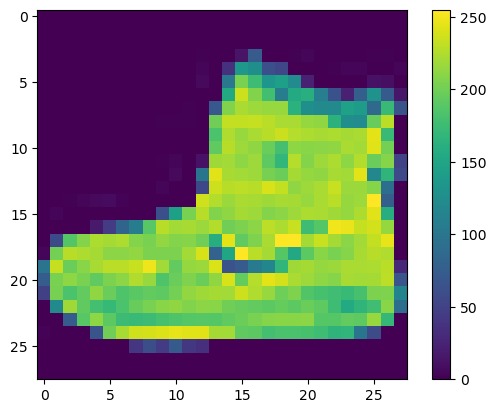

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

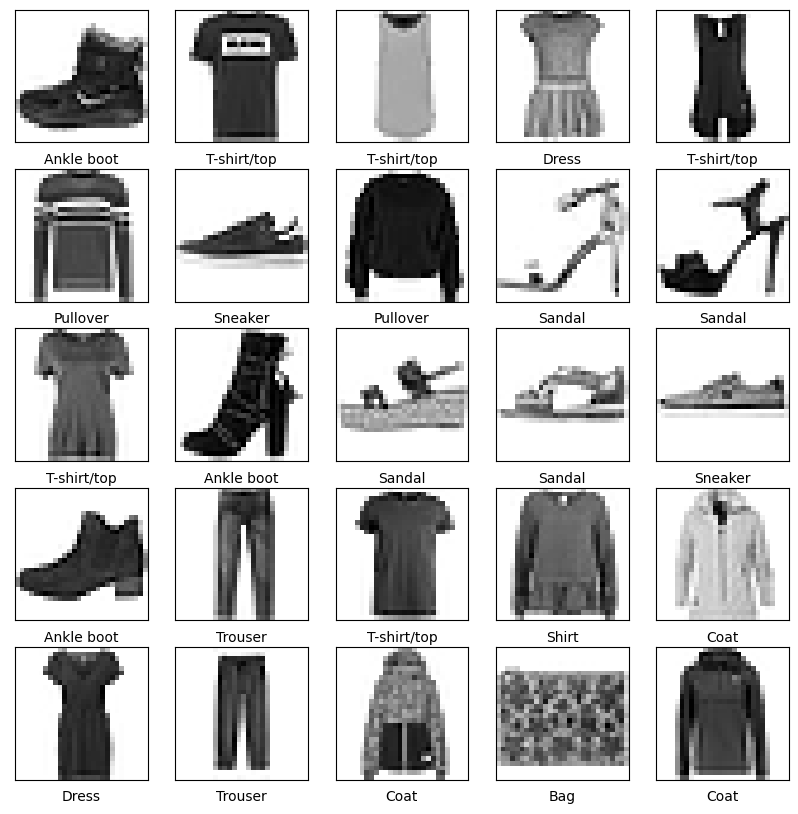

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)
image_index = random.randint(0, 27)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Y_test = test_labels 


# one hot encode outputs
y_train = np_utils.to_categorical(train_labels )
y_test = np_utils.to_categorical(test_labels )

hidden_nodes = 128
num_classes = y_test.shape[1]

def baseline_model(optim):
    # create model
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss = "categorical_crossentropy", optimizer = optim, metrics=['accuracy'])
    return model

In [10]:

def plot_image(i, predictions_array, true_label: ndarray, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i: int, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
def epoch_accuracy_curve(mod: Sequential):
    plt.subplot(2,1,1)
    plt.plot(mod.history['accuracy'])
    plt.plot(mod.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(mod.history['loss'])
    plt.plot(mod.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

def plot_prediction_object(i: int, predictions_array: ndarray):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions_array, Y_test, test_images)
    plt.show()
    plt.subplot(1,2,2)
    plot_value_array(i, predictions_array, Y_test)
    plt.show()

## ADAM

In [13]:
adam = optimizers.Adam()
model_1 = baseline_model(adam)
fitted_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=65, batch_size=128,  verbose=0)
score1 = model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6350 - accuracy: 0.8835


In [14]:
print("ADAM Baseline Accuracy: %.2f%%" % (score1[1]*100))

ADAM Baseline Accuracy: 88.35%


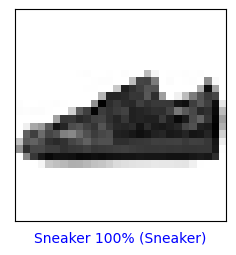

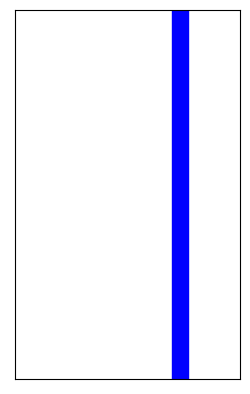

In [15]:
## Predictions using ADAM
predictions_1 = model_1.predict(X_test)
plot_prediction_object(image_index, predictions_1,)

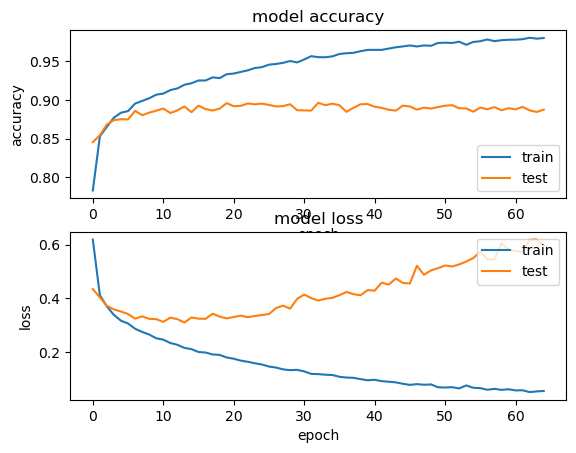

In [16]:
# Accuracy vs Epoch Curve: ADAM
epoch_accuracy_curve(fitted_model_1)

The ADAM's model had a diverging training and testing model accuracy. However, based on the training loss the model may be underfitted based on the downward trend on the training curve. Although this model did correclty predict the image this does not mean that model can continue this prediticion over time.

## SGD

In [17]:
sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
model_2 = baseline_model(sgd)
fitted_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=65, batch_size=128, verbose=0)
score2 = model_2.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.8652


In [18]:
print("SGD Baseline Accuracy: %.2f%%" % (score2[1]*100))

SGD Baseline Accuracy: 86.52%


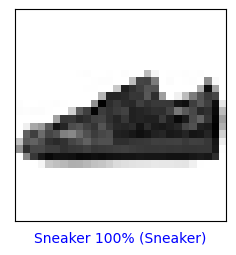

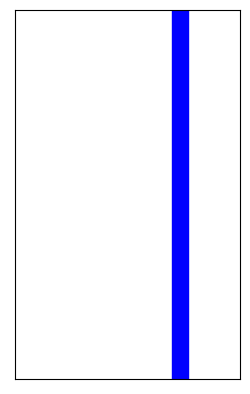

In [19]:
## Predictions using SGD
predictions_2 = model_2.predict(X_test)
plot_prediction_object(image_index, predictions_2)

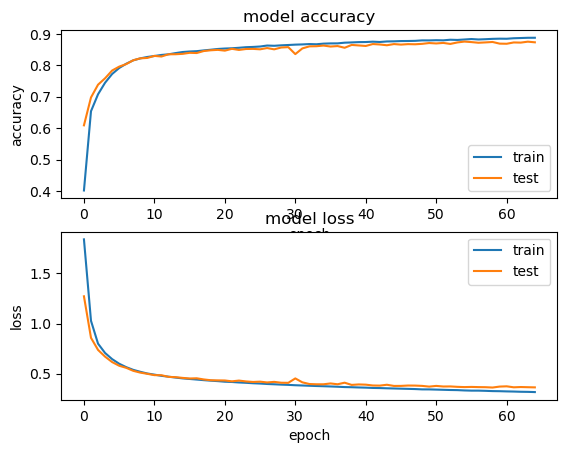

In [20]:
# Accuracy vs Epoch Curve: SGD
epoch_accuracy_curve(fitted_model_2)

In the SGD analysis we see that the model's training and testing Accuracy converged and continued to level itself. The training curve on the model loss shows that the model is a good fit for the data.

In summary, the ADAM model was not the best fit for this data based on the learning curve in the model loss. By increasing the epochs for the model we can see that overtime the model would perform worse with new data. Likewise for the SGD model performed well with the dataset and properly learned. 